# Unsupervised Learning and Dimensionality Reduction

This project will use the datasets from my first project, namely the Pokemon dataset and the handwritten letters dataset, to demonstrate different Unsupervised learnign algorithms for clustering and dimensionality reduction. Namely, for clustering we will be using k-means clustering and EM for k-Gaussian models, and for dimensionality reduction we will be using PCA, ICA, RCA (random projections), and __UNDETERMINED ALGORITHM__.

In [55]:
#Imports for running script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
# from PIL import Image, ImageDraw, ImageFont
#importing data & spliting it into a testing and training set

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split

##Additional imports for clustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#imports for Dim-Redux

from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection

In [2]:
## POKEMON DATASET PREPROCESSING

## POKEMON
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

dataframe = pd.read_csv("./data/Pokemon.csv")

##Constants for pokemon neural net

hidden_node_size = [29]
activation_func = "relu"
max_iter = 600

df = dataframe.copy()

## Change the TYpe1 Type2 Columns into Encoded Feature columns based on categorical data.


types = df["Type 1"].unique()

df = pd.concat([df,pd.get_dummies(df['Type 1'], prefix='is')],axis=1)

for ind, row in df.iterrows():
    if row["Type 2"] in types:
        col = "is_" + row["Type 2"]
        df.set_value(ind, col, 1.0)

#drop columns we don't care about

drop_elements = ["#", "Name", "Type 1", "Type 2", "Generation"]
df = df.drop(drop_elements, axis=1)
pkmn_df = df.copy()


metric = "accuracy"

pkmn_y = pkmn_df["Legendary"]
pkmn_x = pkmn_df.drop(["Legendary"], axis=1) 


# Normalize feature data
scaler = MinMaxScaler()
pkmn_x_scaled = pd.DataFrame(data=scaler.fit_transform(pkmn_x), index=pkmn_x.index, columns=pkmn_x.columns) 

# Combine scaled features with labels
pkmn_df_fin = pd.concat([pkmn_x_scaled, pkmn_y], axis=1)

pkmn_df_fin.head()

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:26: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.



,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,is_Bug,is_Dark,is_Dragon,...,is_Grass,is_Ground,is_Ice,is_Normal,is_Poison,is_Psychic,is_Rock,is_Steel,is_Water,Legendary
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [3]:
# HANDWRITING DATASET PREPROCESSING

##Constants for handwriting neural net

hidden_node_size = [50,50]
activation_func = "relu"
max_iter = 800

#setting up of data
names=['lettr','xbox','ybox','width','high','onpix','xbar','ybar','x2bar','y2bar', \
       'xybar','x2ybr','xy2br','xege','xegvy','yege','yegvx']
dataframe = pd.read_csv('./data/letter-recognition.csv',header=None, names=names, index_col=False)

df = dataframe.copy()

lettr_df = df.copy()

lettr_x = lettr_df.drop(["lettr"], axis=1)
lettr_y = lettr_df["lettr"]

letter_encoder = preprocessing.LabelEncoder()
letter_encoder.fit(df['lettr'].unique().astype(str))
lettr_y_le = letter_encoder.transform(df['lettr'].astype(str))

# # Normalize feature data
scaler = MinMaxScaler()

lettr_x_scaled = pd.DataFrame(data=scaler.fit_transform(lettr_x), index=lettr_x.index, columns=lettr_x.columns) 

# OHE labels
one_hot = LabelBinarizer()
lettr_y_ohe = pd.DataFrame(data=one_hot.fit_transform(lettr_y), index=lettr_y.index)

#Combine scaled features with OHE matrix
lettr_df_fin = pd.concat([lettr_x_scaled, lettr_y_ohe], axis=1)

lettr_df_fin.head()

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,...,16,17,18,19,20,21,22,23,24,25
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,...,0,0,0,1,0,0,0,0,0,0
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,...,0,0,0,0,0,0,0,0,0,0
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,...,0,0,0,0,0,0,0,0,0,0
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,...,0,0,0,0,0,0,0,0,0,0
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,...,0,0,0,0,0,0,0,0,0,0


## Clustering Algorithms

### K-Means

800 26 2
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	1183	0.009	0.006	0.007	-0.044	0.005	0.089
random   	0.03s	1183	0.009	0.006	0.007	-0.044	0.005	0.098
PCA-based	0.00s	1195	0.018	0.013	0.015	-0.063	0.013	0.082


Text(0.5, 1.0, 'K-Means on Raw Pokemon Dataset, k=4')

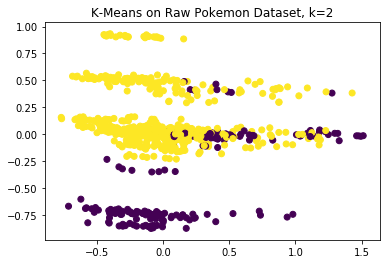

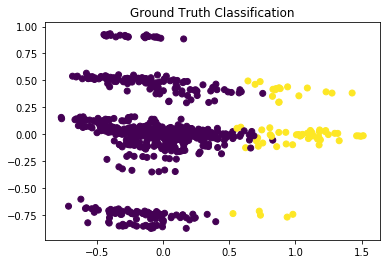

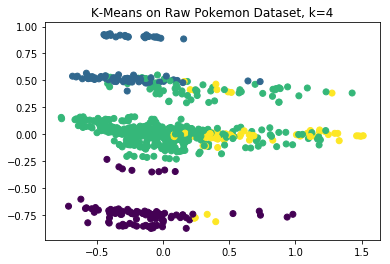

In [24]:
# K Means
from time import time
from sklearn import metrics

def bench_k_means(estimator, name, data, labels):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_, average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# Pokemon First
data = pkmn_df_fin
n_samples, n_features = data.shape

n_labels = n_digits = 2 #len(np.unique(pkmn_y))

print(n_samples, n_features, n_labels)

sample_size = 300
labels = pkmn_y

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_labels, n_init=10),
              name="k-means++", data=data, labels=labels)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random", data=data, labels=labels)

pca = PCA(n_components=n_labels).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_labels, n_init=1),
              name="PCA-based",
              data=data, labels=labels)



# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)

pkmn_y_pred = KMeans(n_clusters=n_labels, random_state=15).fit_predict(pkmn_x_scaled)
# label = pkmn_y_pred

plt.figure()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pkmn_y_pred)
plt.title("K-Means on Raw Pokemon Dataset, k=2")

plt.figure()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pkmn_y)
plt.title("Ground Truth Classification")


pkmn_y_pred = KMeans(n_clusters=4, random_state=102).fit_predict(pkmn_x_scaled)

plt.figure()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pkmn_y_pred)
plt.title("K-Means on Raw Pokemon Dataset, k=4")

k_inertia = []
for k in range(1,9):
    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(pkmn_x_scaled)
    k_inertia[k-1] = km.inertia_

plt.figure()

plt.plot(range(1,9), k_inertia, 'ro-')
plt.title("Clusters vs Inertia")
plt.xlabel("# Clusters")
plt.ylabel("Inertia")


20000 16 26
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	8.66s	2727	0.344	0.354	0.349	0.125	0.346	0.137
random1  	6.08s	2731	0.355	0.365	0.360	0.133	0.357	0.108
random2  	8.65s	2720	0.358	0.366	0.362	0.137	0.359	0.123
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k	inertia
1	7600.009023777777
2	6141.745108663748
3	5558.154389695672
4	5137.973813739097
5	4787.22059245422
6	4519.660478512463
7	4311.077099608549
8	4129.143525546917
9	3950.590721953602
10	3811.2658621895894
11	3686.0628855200466
12	3566.0963038239474
13	3469.4601688535163
14	3387.666021116584
15	3306.5813349236964
16	3238.505660172104
17	3169.888148998607
18	3111.4458465646358
19	3048.0119568914683
20	2996.224170647203
21	2937.515176695714
22	2890.338422866789
23	2855.4685798464106
24	2801.9296274483586
25	2755.003508554962


Text(0.5, 1.0, 'Ground Truth Classification')

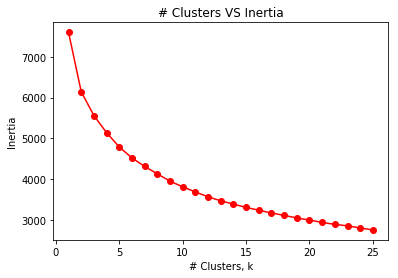

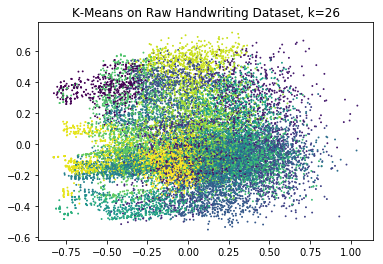

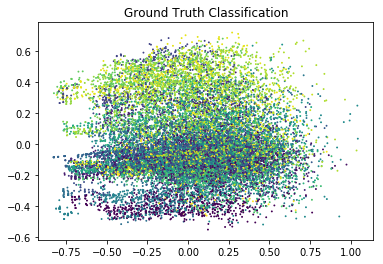

In [118]:
# Handwriting data next

data = lettr_x_scaled
n_samples, n_features = data.shape

n_labels = n_digits = len(np.unique(lettr_y))

print(n_samples, n_features, n_labels)

sample_size = 300
labels = lettr_y_le

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_labels, n_init=10),
              name="k-means++", data=data, labels=labels)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random1", data=data, labels=labels)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random2", data=data, labels=labels)

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

print('k\tinertia')

k_inertia = []
for k in range(1,26):
    km_hld = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km_hld.fit(data)
    k_inertia.append(km_hld.inertia_)
    print(f"{k}\t{km_hld.inertia_}")
    
plt.figure()
plt.plot(range(1,26), k_inertia, "ro-")
plt.title("# Clusters VS Inertia")
plt.xlabel("# Clusters, k")
plt.ylabel("Inertia")


# pca = PCA(n_components=n_labels).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_labels, n_init=1),
#               name="PCA-based",
#               data=data, labels=labels)

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=3).fit_transform(data)

lettr_y_pred = KMeans(n_clusters=n_labels, random_state=15).fit_predict(lettr_x_scaled)
# label = pkmn_y_pred

plt.figure()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=lettr_y_pred, s=.8)
plt.title(f"K-Means on Raw Handwriting Dataset, k={n_labels}")

plt.figure()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=lettr_y_le, s=.8)
plt.title("Ground Truth Classification")
# plt.set_xlabel("PC1")
# plt.set_ylabel("PC2")

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=lettr_y_pred)
# ax.title(f"K-Means on Raw Handwriting Dataset 3D, k={n_labels}")

# fig.show()

# pkmn_y_pred = KMeans(n_clusters=4, random_state=102).fit_predict(pkmn_x)

# plt.figure()

# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pkmn_y_pred)
# plt.title("K-Means on Raw Pokemon Dataset, k=4")


### EM- Gaussian Mixture Model

init		time	homo	compl	v-meas	ARI	AMI
GMM      	0.00s	0.044	0.023	0.030	-0.063	0.028
GMM-HLD  	0.00s	0.458	0.471	0.464	0.197	0.462


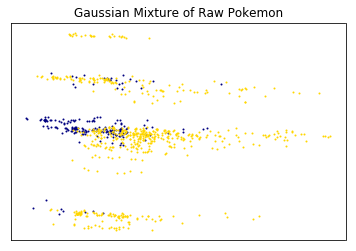

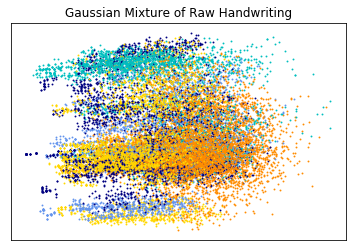

In [81]:
#EM Display

import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

data = pkmn_df_fin


color_iter = itertools.cycle(['navy', 'gold',
                              'darkorange', 'c', 'cornflowerblue'])

def plot_results(X, Y_, means, covariances, index, title, scale=1):
    plt.figure()
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, s=scale)

#         # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

#metric scores

def bench_gmm(label_y_pred, name, labels):
    t0 = time()
    print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0),
             metrics.homogeneity_score(labels, label_y_pred),
             metrics.completeness_score(labels, label_y_pred),
             metrics.v_measure_score(labels, label_y_pred),
             metrics.adjusted_rand_score(labels, label_y_pred),
             metrics.adjusted_mutual_info_score(labels,  label_y_pred, average_method='arithmetic')))

#Pokemon first

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(pkmn_x_scaled)

pkmn_y_pred = gmm.predict(pkmn_x_scaled)

reduced_data = PCA(n_components=2).fit_transform(data)


print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI')
bench_gmm(pkmn_y_pred, "GMM", pkmn_y)

plot_results(reduced_data, pkmn_y_pred, gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture of Raw Pokemon', scale=1)


gmm_hw = GaussianMixture(n_components=26, covariance_type="full")
gmm_hw.fit(lettr_x_scaled)

lettr_y_pred = gmm_hw.predict(lettr_x_scaled)

reduced_data = PCA(n_components=2).fit_transform(lettr_df_fin)

bench_gmm(lettr_y_pred, "GMM-HLD", lettr_y_le)

plot_results(reduced_data, lettr_y_pred, gmm_hw.means_, gmm_hw.covariances_, 0,
             'Gaussian Mixture of Raw Handwriting', scale=.8)



## Feature Transformation Algorithms

### PCA

explained variance ratio: [0.09988738 0.09011526 0.08809556 0.07072429 0.06666603 0.06395211
 0.0550915  0.04921737 0.04695678 0.04470303 0.04132796 0.03991688
 0.03845363 0.03677979 0.03494566 0.03238628 0.03005601]
Sum of explained variance: 0.9292755096406935
explained variance ratio: [0.28676168 0.1506864  0.12506651 0.08751311 0.07601489 0.05613688
 0.05076389 0.03927907 0.03150354]
Sum of explained variance: 0.9037259621539758


Text(0, 0.5, 'Explained Variance')

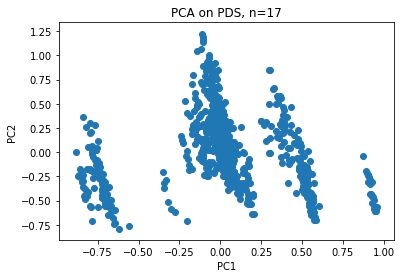

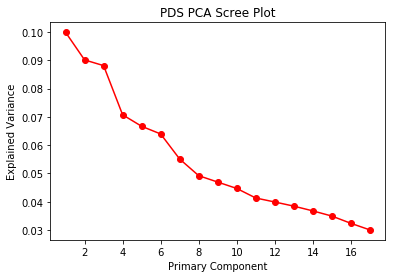

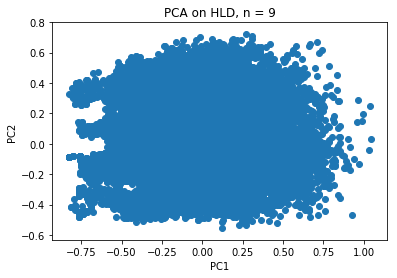

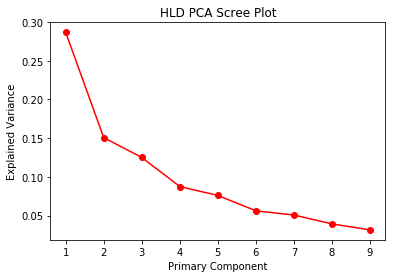

In [59]:
pca_pkmn = PCA(n_components=17)

pkmn_xp = pca_pkmn.fit_transform(pkmn_x_scaled)

print('explained variance ratio: %s'
      % str(pca_pkmn.explained_variance_ratio_))

print(f"Sum of explained variance: {sum(pca_pkmn.explained_variance_ratio_)}")

plt.figure()

plt.scatter(pkmn_xp[:, 0], pkmn_xp[:, 1])
plt.title(f"PCA on PDS, n={pca_pkmn.n_components_}")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.figure()
pc_s = np.arange(pca_pkmn.n_components_) + 1
plt.plot(pc_s, pca_pkmn.explained_variance_ratio_, 'ro-')
plt.title("PDS PCA Scree Plot")
plt.xlabel("Primary Component")
plt.ylabel("Explained Variance")

pca_hld = PCA(n_components=9)

lettr_xp = pca_hld.fit_transform(lettr_x_scaled)

print('explained variance ratio: %s'
      % str(pca_hld.explained_variance_ratio_))

print(f"Sum of explained variance: {sum(pca_hld.explained_variance_ratio_)}")

plt.figure()
plt.scatter(lettr_xp[:, 0], lettr_xp[:, 1])
plt.title(f"PCA on HLD, n = {pca_hld.n_components_}")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.figure()
pc_s = np.arange(pca_hld.n_components_) + 1
plt.plot(pc_s, pca_hld.explained_variance_ratio_, 'ro-')
plt.title("HLD PCA Scree Plot")
plt.xlabel("Primary Component")
plt.ylabel("Explained Variance")



### ICA

ICA Kurtosis, n=2: [0.07635582 0.45510865], Mean: 0.2657322334671086
ICA Kurtosis, n=3: [1.02230674 0.10002015 1.50293987], Mean: 0.8750889185767767
ICA Kurtosis, n=4: [0.94649796 0.49671748 1.35368575 1.76913577], Mean: 1.141509238547092
ICA Kurtosis, n=5: [1.73062304 1.93806785 2.22066731 1.25189006 0.96700582], Mean: 1.6216508137217531
ICA Kurtosis, n=6: [1.64043632 2.87542582 2.43582376 1.20483728 2.28712862 1.98911058], Mean: 2.072127063698928
ICA Kurtosis, n=7: [1.97278487 1.9882022  3.21360495 1.85561644 1.21897924 2.63879461
 2.43952112], Mean: 2.1896433469739702
ICA Kurtosis, n=8: [2.60933789 2.659187   3.82502082 2.59566906 2.0863999  1.11272067
 3.50807613 1.85161842], Mean: 2.5310037365222335
ICA Kurtosis, n=9: [2.74175626 2.69830827 4.58590504 1.16121719 0.57423077 2.01844096
 4.28260935 2.62764425 3.54848574], Mean: 2.6931775369560715
ICA Kurtosis, n=10: [ 3.40661741  2.71140974  2.74536454  4.6984289   3.16205025  2.16469777
  2.06136274  2.60173151  4.41948724 -0.071221

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



Text(0, 0.5, 'Avg. Kurtosis')

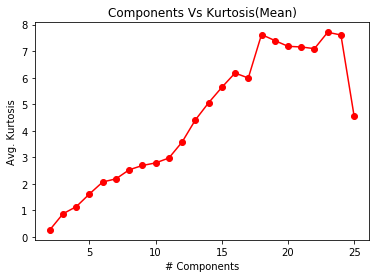

In [140]:
ica_pkmn_best = None
best_kurt = 0

import statistics

ica_kurt = []

for i in range(2, 26):
    ica_pkmn = FastICA(n_components=i, max_iter=1000)

    pkmn_xi = ica_pkmn.fit_transform(pkmn_x_scaled)
    
    print(f"ICA Kurtosis, n={i}: {kurtosis(pkmn_xi)}, Mean: {statistics.mean(kurtosis(pkmn_xi))}")
    ica_kurt.append(statistics.mean(kurtosis(pkmn_xi)))
    if statistics.mean(kurtosis(pkmn_xi)) > best_kurt:
        ica_pkmn_best = ica_pkmn
        best_kurt = statistics.mean(kurtosis(pkmn_xi))
    

#     plt.figure()
#     plt.scatter(pkmn_xi[:, 0], pkmn_xi[:, 1])
#     plt.title(f"ICA on PDS, n={len(ica_pkmn.components_)}")
#     plt.xlabel("IC1")
#     plt.ylabel("IC2")
    
pkmn_xi = ica_pkmn_best.transform(pkmn_x_scaled)


print(len(ica_pkmn_best.components_))
plt.figure()

plt.plot(range(2,26), ica_kurt, "ro-")
plt.title("Components Vs Kurtosis(Mean)")
plt.xlabel("# Components")
plt.ylabel("Avg. Kurtosis")

ICA Kurtosis, n=2: [-0.48722278 -0.17200325], Mean: -0.3296130125047432
ICA Kurtosis, n=3: [-0.20628629 -0.47956171  0.52545239], Mean: -0.05346520661236065


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



ICA Kurtosis, n=4: [-0.62661473  0.27512753 -0.74797417 -0.47383458], Mean: -0.3933239866194419


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



ICA Kurtosis, n=5: [ 1.84080185 -0.47936574 -0.83199776  0.44722163  0.60988108], Mean: 0.3173082126357209
ICA Kurtosis, n=6: [ 0.65978628  1.13848462 -0.4250632   1.28005414 -0.53365582  2.82998217], Mean: 0.8249313644164017
ICA Kurtosis, n=7: [ 3.05761892 -0.47912034 -0.51434961 -0.57855254 12.46576873  0.82070997
  1.08064093], Mean: 2.2646737219967905
ICA Kurtosis, n=8: [-0.42855293 -0.69552076  1.9777586   1.93605821  1.29670232 12.60909297
  3.41882574  0.82595523], Mean: 2.617539923749813
ICA Kurtosis, n=9: [ 1.28224779  2.50083742 -0.28131291  0.90772716  4.56687738 -0.73667931
  3.51415604 14.04407286  2.08550337], Mean: 3.0981588657860923
ICA Kurtosis, n=10: [ 1.79576526  1.08306769  3.68763342 -0.69296789  4.64170027 14.03748254
  1.30487163  2.50321613  2.88007932  0.46243238], Mean: 3.1703280760391594
ICA Kurtosis, n=11: [ 1.0811284  -0.6952089   1.95360549  1.10612653  1.37450867 14.18436722
  3.98556219  2.45712307  4.39633847  3.37357085 -0.50138073], Mean: 2.9741582962

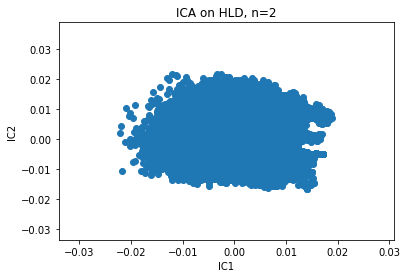

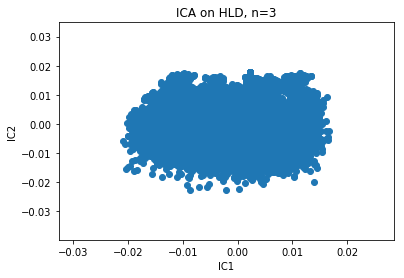

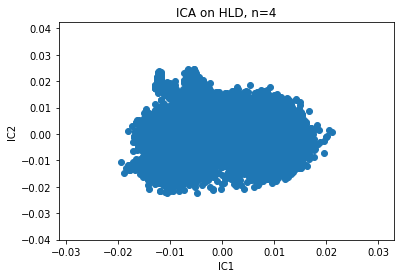

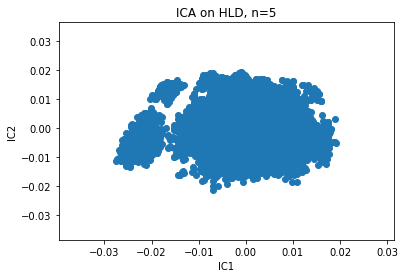

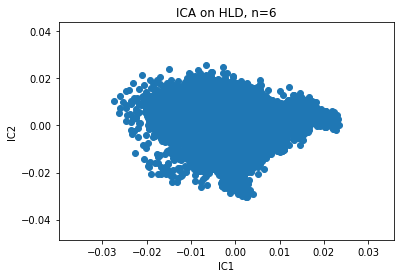

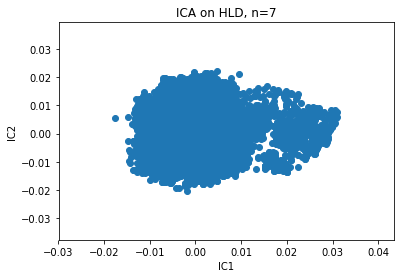

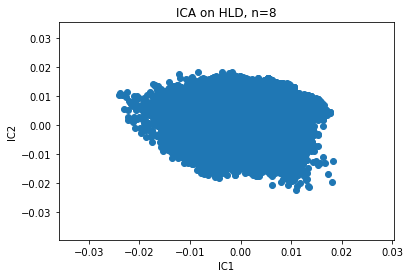

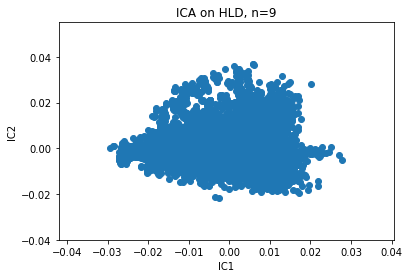

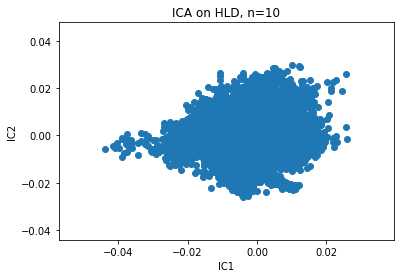

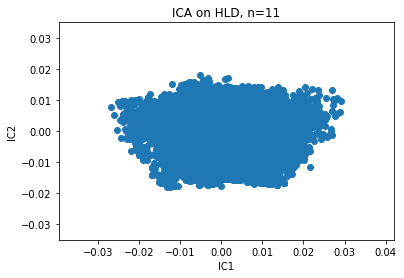

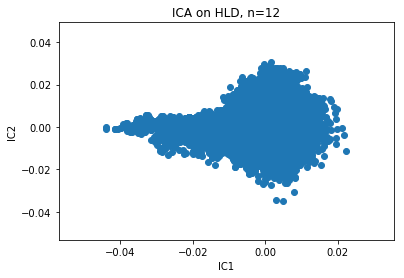

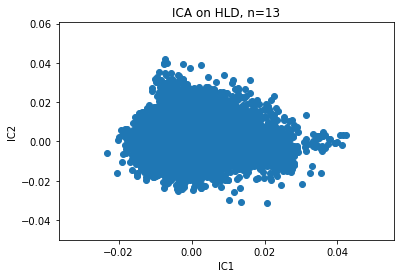

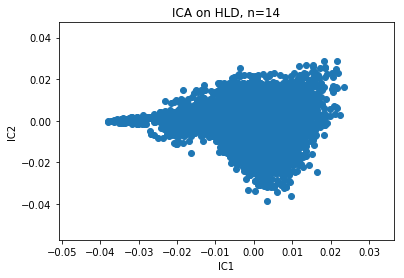

In [136]:
from scipy.stats import kurtosis

ica_hld_best = None
best_kurt = 0



for i in range(2, 15):
    ica_hld = FastICA(n_components=i)

    lettr_xi = ica_hld.fit_transform(lettr_x_scaled)
    print(f"ICA Kurtosis, n={i}: {kurtosis(lettr_xi)}, Mean: {statistics.mean(kurtosis(lettr_xi))}")
    
    if statistics.mean(kurtosis(lettr_xi)) > best_kurt:
        ica_hld_best = ica_hld
        best_kurt = statistics.mean(kurtosis(lettr_xi))

    plt.figure()
    plt.scatter(lettr_xi[:, 0], lettr_xi[:, 1])
    plt.title(f"ICA on HLD, n={len(ica_hld.components_)}")
    plt.xlabel("IC1")
    plt.ylabel("IC2")
    
lettr_xi = ica_hld_best.transform(lettr_x_scaled)
print(len(ica_hld_best.components_))
    

### Random Projections

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning:

The number of components is higher than the number of features: n_features < n_components (25 < 26).The dimensionality of the problem will not be reduced.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning:

The number of components is higher than the number of features: n_features < n_components (25 < 28).The dimensionality of the problem will not be reduced.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning:

The number of components is higher than the number of features: n_features < n_components (25 < 30).The dimensionality of the problem will not be reduced.



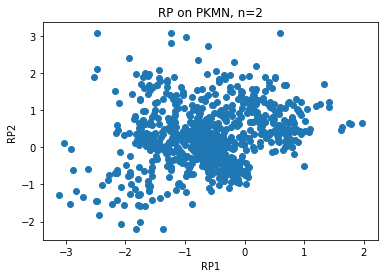

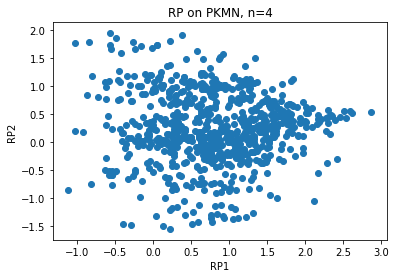

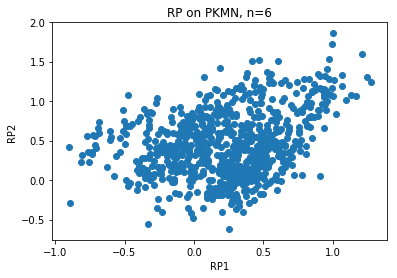

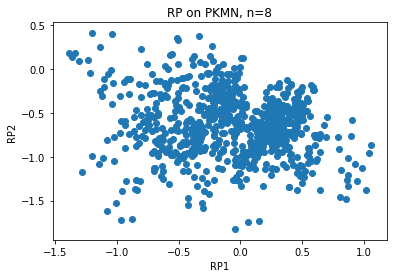

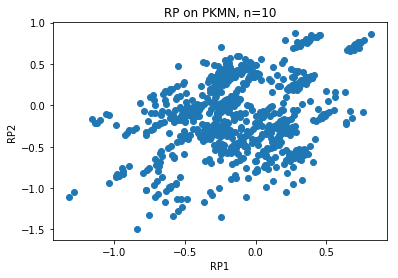

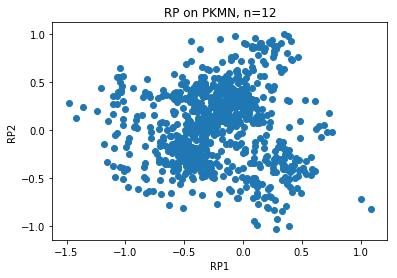

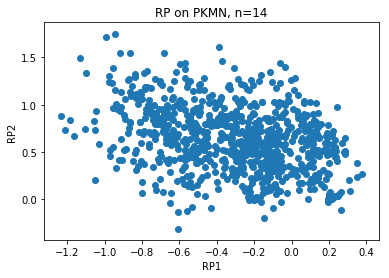

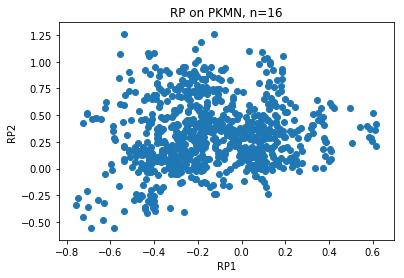

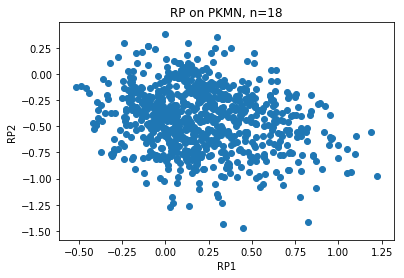

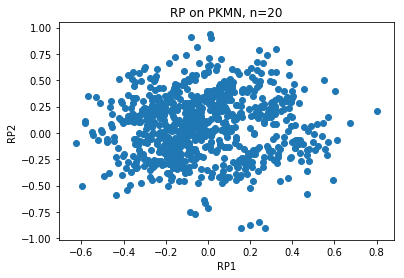

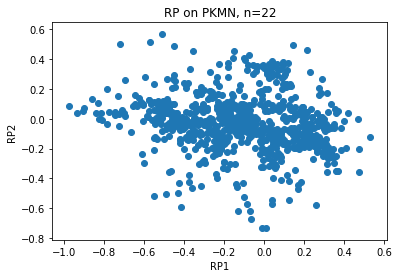

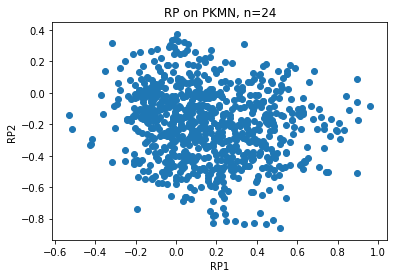

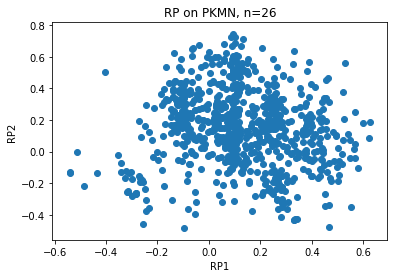

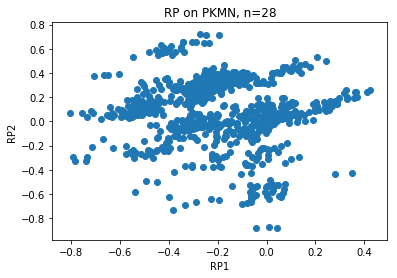

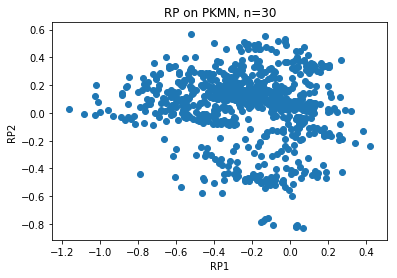

In [128]:
rp_pkmn = None
for i in range(2,31,2):
    rp_pkmn = GaussianRandomProjection(n_components=i)

    pkmn_xr = rp_pkmn.fit_transform(pkmn_x_scaled)
    
    plt.figure()
    plt.scatter(pkmn_xr[:, 0], pkmn_xr[:, 1])
    plt.title(f"RP on PKMN, n={rp_pkmn.n_components_}")
    plt.xlabel("RP1")
    plt.ylabel("RP2")


JL lemma n_components: 10
JL lemma n_components: 10
JL lemma n_components: 10
JL lemma n_components: 10
JL lemma n_components: 10


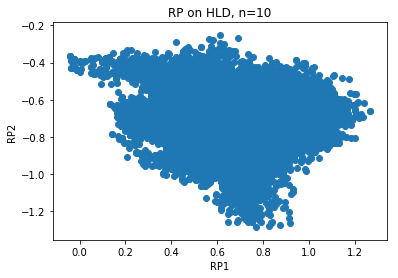

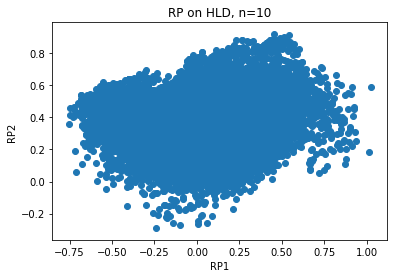

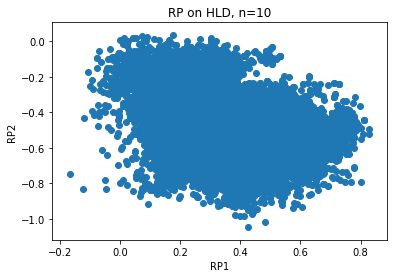

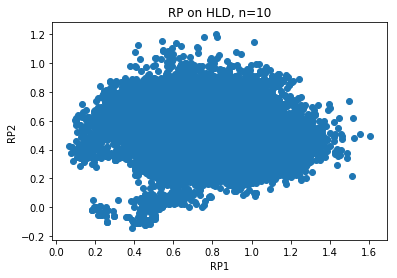

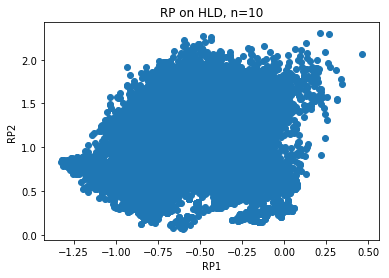

In [66]:
rp_lettr = None
for i in range(5):
    rp_lettr = GaussianRandomProjection(n_components=10)

    lettr_xr = rp_lettr.fit_transform(lettr_x_scaled)
    
    print(f"JL lemma n_components: {rp_lettr.n_components_}")
    
    plt.figure()
    plt.scatter(lettr_xr[:, 0], lettr_xr[:, 1])
    plt.title(f"RP on HLD, n={rp_lettr.n_components_}")
    plt.xlabel("RP1")
    plt.ylabel("RP2")

### Factor Analysis

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\decomposition\factor_analysis.py:238: ConvergenceWarning:

FactorAnalysis did not converge. You might want to increase the number of iterations.



Text(0, 0.5, 'FA2')

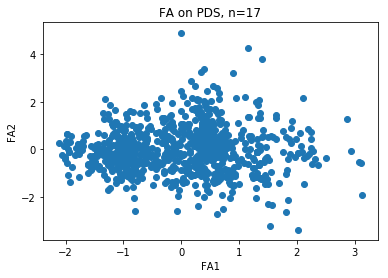

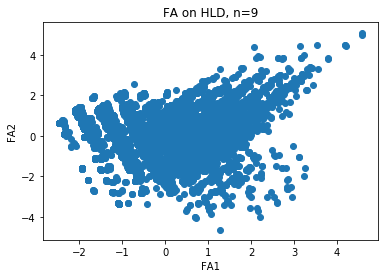

In [129]:
fa_pkmn = FactorAnalysis(n_components=17)

pkmn_xf = fa_pkmn.fit_transform(pkmn_x_scaled)

plt.figure()

plt.scatter(pkmn_xf[:, 0], pkmn_xf[:, 1])
plt.title(f"FA on PDS, n={17}")
plt.xlabel("FA1")
plt.ylabel("FA2")

fa_hld = FactorAnalysis(n_components=9)

lettr_xf = fa_hld.fit_transform(lettr_x_scaled)

plt.figure()
plt.scatter(lettr_xf[:, 0], lettr_xf[:, 1])
plt.title(f"FA on HLD, n={9}")
plt.xlabel("FA1")
plt.ylabel("FA2")


## Clustering on Transformed Data

KMeans on PCA-reduced PDS, k=2	0.14s	1053	0.008	0.004	0.006	0.033	0.004	0.106
KMeans on ICA-reduced PDS, k=2	0.06s	7	0.039	0.031	0.034	0.137	0.032	0.218
KMeans on RP-reduced PDS, k=2	0.06s	1026	0.005	0.002	0.003	-0.000	0.002	0.128
KMeans on FA-reduced PDS, k=2	0.09s	11957	0.039	0.031	0.034	0.137	0.032	0.084


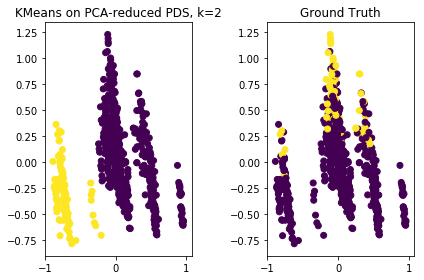

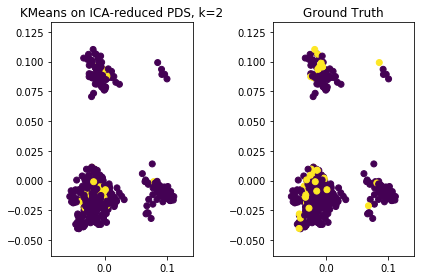

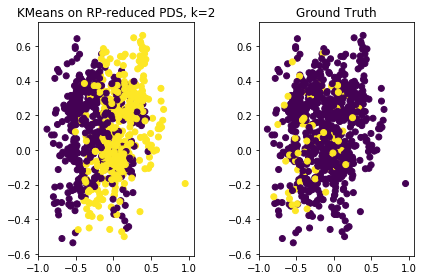

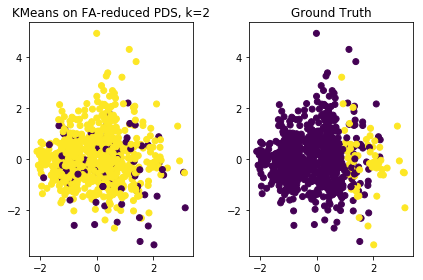

In [73]:
dm_alg_names = ["PCA", "ICA", "RP", "FA"]
dm_pkmn = [pca_pkmn, ica_pkmn_best, rp_pkmn, fa_pkmn]
rd_pkmn = [pkmn_xp, pkmn_xi, pkmn_xr, pkmn_xf]
dm_lettr = [pca_hld, ica_hld_best, rp_lettr, fa_hld]
rd_lettr = [lettr_xp, lettr_xi, lettr_xr, lettr_xf]

#K Means on Pokemon

for alg in range(len(dm_alg_names)):
    
    bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10),
              name=f"KMeans on {dm_alg_names[alg]}-reduced PDS, k=2", data=rd_pkmn[alg], labels=pkmn_y)
    
    kmean = KMeans(init='k-means++', n_clusters=2, n_init=10)
    pkmn_y_pred = kmean.fit_predict(rd_pkmn[alg])
    
    plt.figure()
    
    plt.subplot(121)
    
    plt.scatter(rd_pkmn[alg][:, 0],rd_pkmn[alg][:, 1], c=pkmn_y_pred)
    plt.title(f"KMeans on {dm_alg_names[alg]}-reduced PDS, k=2")
    
    plt.subplot(122)
    
    plt.scatter(rd_pkmn[alg][:, 0],rd_pkmn[alg][:, 1], c=pkmn_y)
    plt.title("Ground Truth")
    
    plt.tight_layout()
    

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
PCA-reduced HLD	19.81s	2103	0.348	0.357	0.353	0.127	0.349	0.158
ICA-reduced HLD	14.14s	5	0.435	0.457	0.446	0.202	0.443	0.145
RP-reduced HLD	24.21s	2909	0.290	0.297	0.293	0.096	0.290	0.148
FA-reduced HLD	19.37s	58337	0.399	0.405	0.402	0.184	0.399	0.139


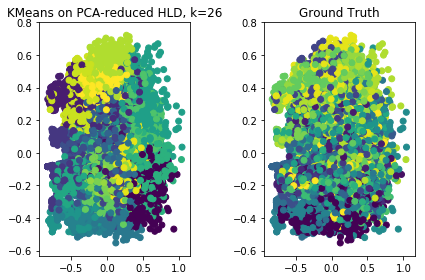

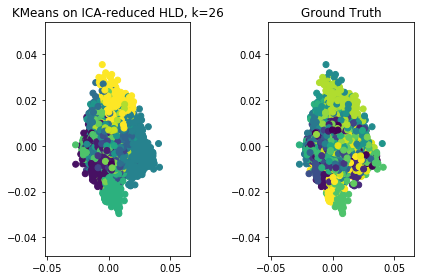

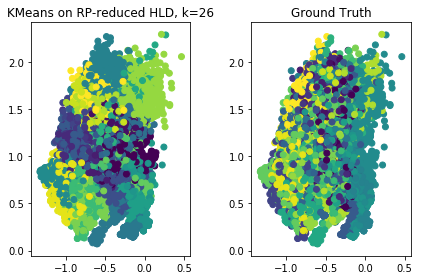

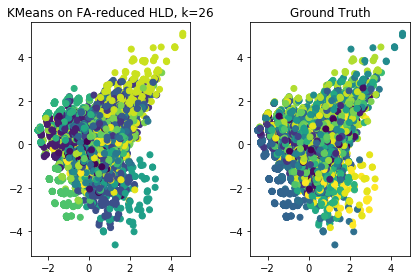

In [76]:
#KMeans on Handwriting

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

for alg in range(len(dm_alg_names)):
    
    bench_k_means(KMeans(init='k-means++', n_clusters=26, n_init=10),
              name=f"{dm_alg_names[alg]}-reduced HLD", data=rd_lettr[alg], labels=lettr_y)
    
    kmean = KMeans(init='k-means++', n_clusters=26, n_init=10)
    lettr_y_pred = kmean.fit_predict(rd_lettr[alg])
    
    plt.figure()
    
    plt.subplot(121)
    
    plt.scatter(rd_lettr[alg][:, 0],rd_lettr[alg][:, 1], c=lettr_y_pred)
    plt.title(f"KMeans on {dm_alg_names[alg]}-reduced HLD, k=26")
    
    plt.subplot(122)
    
    plt.scatter(rd_lettr[alg][:, 0],rd_lettr[alg][:, 1], c=lettr_y_le)
    plt.title("Ground Truth")
    
    plt.tight_layout()

init		time	homo	compl	v-meas	ARI	AMI
GMM-PCA PDS	0.00s	0.009	0.006	0.007	-0.044	0.005
GMM-ICA PDS	0.00s	0.009	0.006	0.007	-0.044	0.005
GMM-RP PDS	0.00s	0.011	0.005	0.006	-0.017	0.005
GMM-FA PDS	0.00s	0.030	0.012	0.017	0.014	0.016


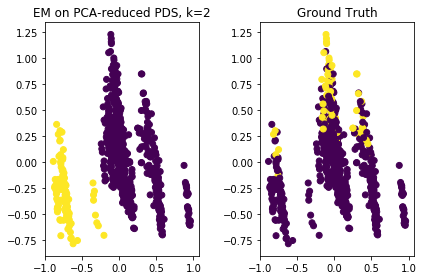

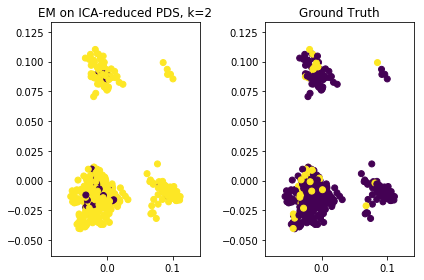

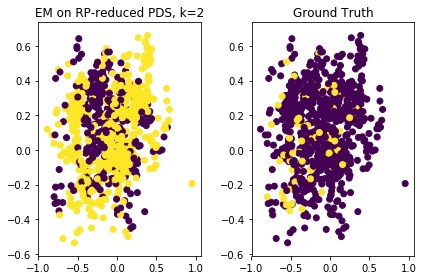

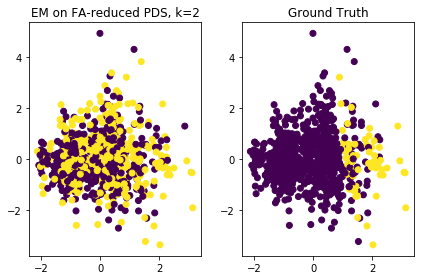

In [82]:
# EM Pokemon

print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI')
for alg in range(len(dm_alg_names)):
    
#     bench_gmm(KMeans(init='k-means++', n_clusters=2, n_init=10),
#               name=f"KMeans on {dm_alg_names[alg]}-reduced PDS, k=2", data=rd_pkmn[alg], labels=pkmn_y)
    
    gmm = GaussianMixture(n_components=2, covariance_type="full")
    pkmn_y_pred = gmm.fit_predict(rd_pkmn[alg])
    
    
    bench_gmm(pkmn_y_pred, f"GMM-{dm_alg_names[alg]} PDS", pkmn_y)
    plt.figure()
    
    plt.subplot(121)
    
    plt.scatter(rd_pkmn[alg][:, 0],rd_pkmn[alg][:, 1], c=pkmn_y_pred)
    plt.title(f"EM on {dm_alg_names[alg]}-reduced PDS, k=2")
    
    plt.subplot(122)
    
    plt.scatter(rd_pkmn[alg][:, 0],rd_pkmn[alg][:, 1], c=pkmn_y)
    plt.title("Ground Truth")
    
    plt.tight_layout()

init		time	homo	compl	v-meas	ARI	AMI
GMM-PCA HLD	0.00s	0.462	0.477	0.469	0.206	0.467
GMM-ICA HLD	0.00s	0.479	0.509	0.494	0.209	0.491
GMM-RP HLD	0.00s	0.414	0.437	0.425	0.157	0.422
GMM-FA HLD	0.00s	0.454	0.469	0.461	0.191	0.459


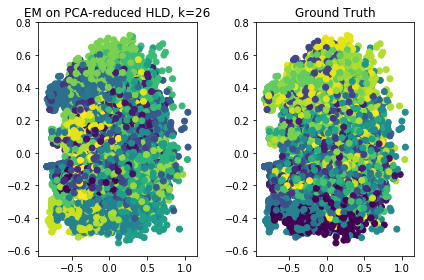

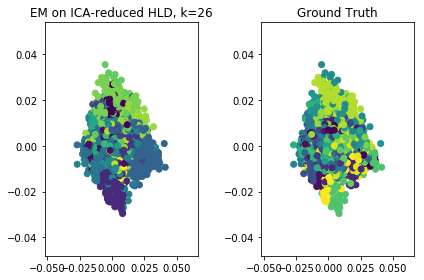

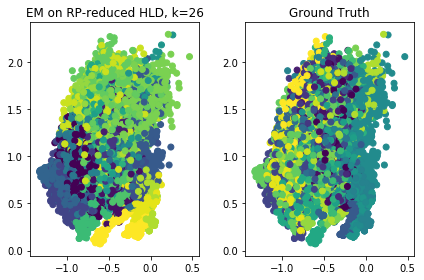

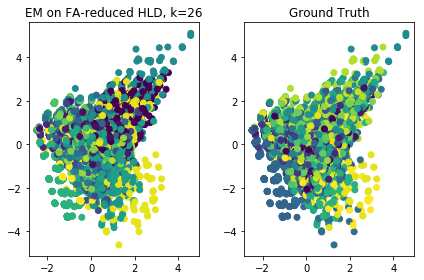

In [85]:
# EM Handwriting

print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI')
for alg in range(len(dm_alg_names)):
    
#     bench_gmm(KMeans(init='k-means++', n_clusters=2, n_init=10),
#               name=f"KMeans on {dm_alg_names[alg]}-reduced PDS, k=2", data=rd_pkmn[alg], labels=pkmn_y)
    
    gmm = GaussianMixture(n_components=26, covariance_type="full")
    lettr_y_pred = gmm.fit_predict(rd_lettr[alg])
    
    
    bench_gmm(lettr_y_pred, f"GMM-{dm_alg_names[alg]} HLD", lettr_y_le)
    plt.figure()
    
    plt.subplot(121)
    
    plt.scatter(rd_lettr[alg][:, 0],rd_lettr[alg][:, 1], c=lettr_y_pred)
    plt.title(f"EM on {dm_alg_names[alg]}-reduced HLD, k=26")
    
    plt.subplot(122)
    
    plt.scatter(rd_lettr[alg][:, 0],rd_lettr[alg][:, 1], c=lettr_y_le)
    plt.title("Ground Truth")
    
    plt.tight_layout()

## Neural Network using Dimensionally Transformed Data

Neural Network for PCA on PDS
0.9296875 {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'max_iter': 1000, 'solver': 'lbfgs'}
Testing set score:  0.32


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Confusion matrix, without normalization
[[139  12]
 [  5   4]]


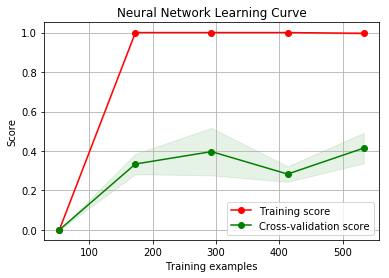

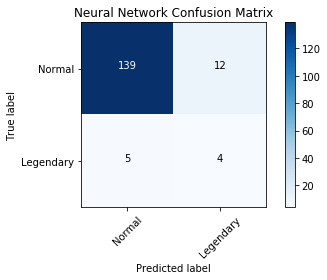

Neural Network for ICA on PDS
0.9390625 {'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'max_iter': 600, 'solver': 'lbfgs'}
Testing set score:  0.41666666666666663


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Confusion matrix, without normalization
[[141   6]
 [  8   5]]


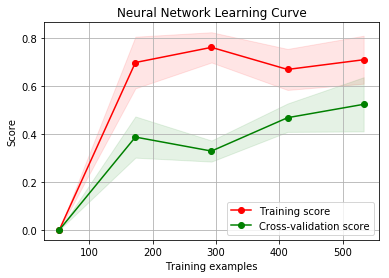

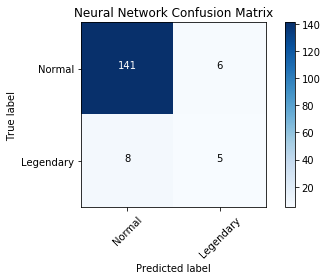

Neural Network for RP on PDS
0.9125 {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'max_iter': 200, 'solver': 'lbfgs'}
Testing set score:  0.7333333333333334


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Confusion matrix, without normalization
[[141   5]
 [  3  11]]


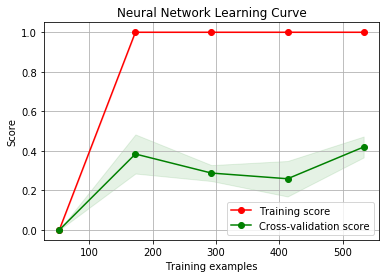

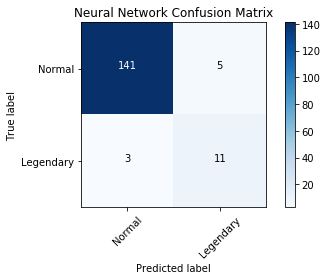

Neural Network for FA on PDS
0.9578125 {'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'max_iter': 800, 'solver': 'lbfgs'}
Testing set score:  0.42857142857142855


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Confusion matrix, without normalization
[[138  10]
 [  6   6]]


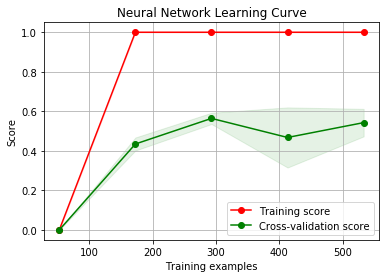

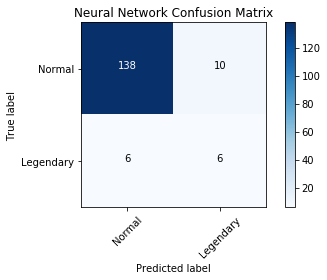

In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from plot_learning_curve import plot_learning_curve
from plot_validation_curve import plot_validation_curve
from plot_confusion_matrix import plot_confusion_matrix
## Run each DR alg on the data, then run a NN learner on it

#Pokemon
for alg in range(len(dm_alg_names)):
    
    pkmn_new_x = pd.DataFrame(data=rd_pkmn[alg])
    
    pkmn_new_df = pd.concat([pkmn_new_x, pkmn_y], axis=1)
    
    train_nn, test_nn = train_test_split(pkmn_new_df, test_size=0.2)
    
    train_y_nn = train_nn["Legendary"]
    train_x_nn = train_nn.drop(["Legendary"], axis=1)

    test_y_nn = test_nn["Legendary"]
    test_x_nn = test_nn.drop(["Legendary"], axis=1)
    
    print("=" * 40)
    print(f"Neural Network for {dm_alg_names[alg]} on PDS")
    
    param_grid={
    'activation': ["relu", "tanh"],
    'solver': ['lbfgs'],
    'hidden_layer_sizes': [(20,20)], #[(x,y) for x in range(1,30) for y in [1,2]],
    'max_iter': [200 ,400, 600, 800, 1000]}
    
    nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
    nn_clf.fit(X=train_x_nn, y=train_y_nn)

    nn_model = nn_clf.best_estimator_
    print(nn_clf.best_score_, nn_clf.best_params_)

    y_pred = nn_model.predict(test_x_nn)
    
    print("Testing set score: ", f1_score(test_y_nn, y_pred))

    plot_learning_curve(nn_model, "Neural Network Learning Curve", pkmn_new_x, pkmn_y, cv=3, scoring="f1")

    cnf_mtx = confusion_matrix(test_y_nn, y_pred)
    plt.figure()
    plot_confusion_matrix(cnf_mtx, classes=["Normal","Legendary"], normalize=False, title="Neural Network Confusion Matrix")
    plt.show()

    

Neural Network for PCA on HLD
0.7666875 {'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'max_iter': 1000, 'solver': 'lbfgs'}
Testing set accuracy:  0.8442713312285934


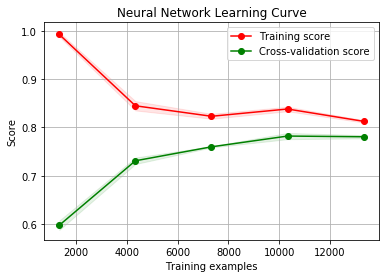

Neural Network for ICA on HLD
0.4834375 {'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'max_iter': 1000, 'solver': 'lbfgs'}
Testing set accuracy:  0.6256384360821315


C:\Users\nacha\Miniconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



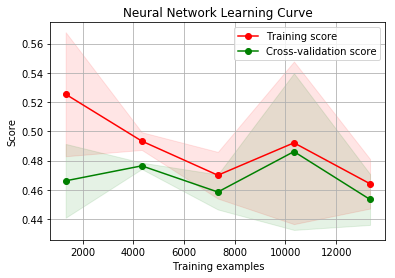

Neural Network for RP on HLD
0.62225 {'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'max_iter': 800, 'solver': 'lbfgs'}
Testing set accuracy:  0.7054130557873328


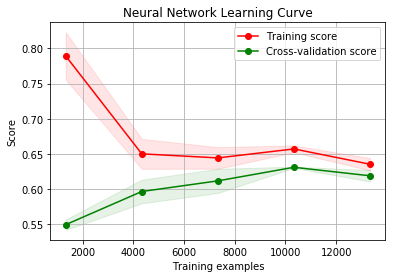

Neural Network for FA on HLD
0.7486875 {'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'max_iter': 800, 'solver': 'lbfgs'}
Testing set accuracy:  0.8225341417852836


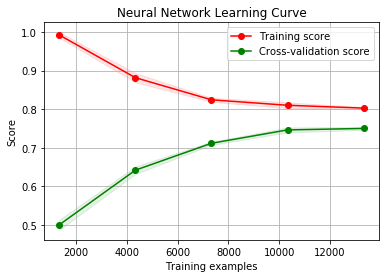

In [137]:
# Handwriting

for alg in range(len(dm_alg_names)):
    
    lettr_new_x = pd.DataFrame(data=rd_lettr[alg])
    
    lettr_new_df = pd.concat([lettr_new_x, lettr_y_ohe], axis=1)
    
    train_nn, test_nn = train_test_split(lettr_new_df, test_size=0.2)
    
   
    
    train_y_nn = train_nn.iloc[:, -26:]
    train_x_nn = train_nn.iloc[:, :-26]

    test_y_nn = test_nn.iloc[:, -26:]
    test_x_nn = test_nn.iloc[:, :-26]
    

    
    print("=" * 40)
    print(f"Neural Network for {dm_alg_names[alg]} on HLD")
    
    param_grid={
    'activation': ["relu", "tanh"],
    'solver': ['lbfgs'],
    'hidden_layer_sizes': [(30,30)], #[(x,y) for x in range(1,30) for y in [1,2]],
    'max_iter': [200 ,400, 600, 800, 1000]}
    
    nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
    nn_clf.fit(X=train_x_nn, y=train_y_nn)

    nn_model = nn_clf.best_estimator_
    print(nn_clf.best_score_, nn_clf.best_params_)

    y_pred = nn_model.predict(test_x_nn)
    
    print("Testing set accuracy: ", f1_score(test_y_nn, y_pred, average="macro"))

    plot_learning_curve(nn_model, "Neural Network Learning Curve", lettr_new_x, lettr_y_ohe, cv=3, scoring=metric)

    plt.show()



## Neural Network With Appended Cluster Data

Neural Network for KMeans on PDS
0.9484375 {'activation': 'tanh', 'hidden_layer_sizes': (90, 50), 'max_iter': 800, 'solver': 'lbfgs'}
Testing set accuracy:  0.6
Confusion matrix, without normalization
[[146   4]
 [  4   6]]


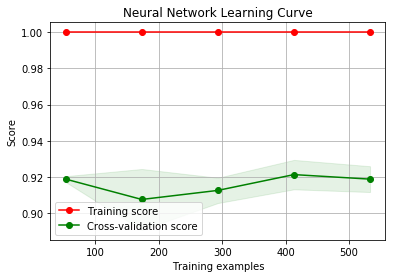

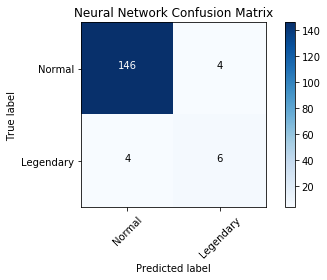

In [141]:
# Pokemon KM NN

kmean = KMeans(init='k-means++', n_clusters=2, n_init=10)
pkmn_y_pred = kmean.fit_predict(pkmn_x_scaled)

pkmn_new_x = pd.concat([pkmn_x_scaled,pd.DataFrame(data=pkmn_y_pred)], axis=1)
    
pkmn_new_df = pd.concat([pkmn_new_x, pkmn_y], axis=1)

train_nn, test_nn = train_test_split(pkmn_new_df, test_size=0.2)

train_y_nn = train_nn["Legendary"]
train_x_nn = train_nn.drop(["Legendary"], axis=1)

test_y_nn = test_nn["Legendary"]
test_x_nn = test_nn.drop(["Legendary"], axis=1)

print("=" * 40)
print(f"Neural Network for KMeans on PDS")

param_grid={
'activation': ["relu", "tanh"],
'solver': ['lbfgs'],
'hidden_layer_sizes': [(x,y) for x in range(10,101,10) for y in range(10,101,10)],
'max_iter': [200 ,400, 600, 800, 1000]}

nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
nn_clf.fit(X=train_x_nn, y=train_y_nn)

nn_model = nn_clf.best_estimator_
print(nn_clf.best_score_, nn_clf.best_params_)

y_pred = nn_model.predict(test_x_nn)

print("Testing set accuracy: ", f1_score(test_y_nn, y_pred))

plot_learning_curve(nn_model, "Neural Network Learning Curve", pkmn_new_x, pkmn_y, cv=3, scoring=metric)

cnf_mtx = confusion_matrix(test_y_nn, y_pred)
plt.figure()
plot_confusion_matrix(cnf_mtx, classes=["Normal","Legendary"], normalize=False, title="Neural Network Confusion Matrix")
plt.show()

Neural Network for KMeans on HLD
0.6358125 {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'lbfgs'}
Testing set accuracy:  0.7880965019731522


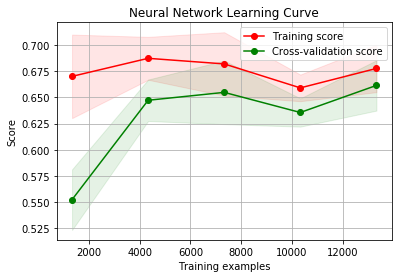

In [134]:
# HLD KM NN

    
kmean = KMeans(init='k-means++', n_clusters=26, n_init=10)
lettr_y_pred = kmean.fit_predict(lettr_x_scaled)

lettr_new_x = pd.concat([pd.DataFrame(data=lettr_y_pred),lettr_x_scaled], axis=1)

lettr_new_df = pd.concat([lettr_new_x, lettr_y_ohe], axis=1)

train_nn, test_nn = train_test_split(lettr_new_df, test_size=0.2)



train_y_nn = train_nn.iloc[:, -26:]
train_x_nn = train_nn.iloc[:, :-26]

test_y_nn = test_nn.iloc[:, -26:]
test_x_nn = test_nn.iloc[:, :-26]



print("=" * 40)
print(f"Neural Network for KMeans on HLD")

param_grid={
'activation': ["relu", "tanh"],
'solver': ['lbfgs'],
'hidden_layer_sizes': [(50,50)], #[(x,y) for x in range(1,101,20) for y in range(1,101,20)],
'max_iter': [200 ,400, 600, 800, 1000]}

nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
nn_clf.fit(X=train_x_nn, y=train_y_nn)

nn_model = nn_clf.best_estimator_
print(nn_clf.best_score_, nn_clf.best_params_)

y_pred = nn_model.predict(test_x_nn)

print("Testing set accuracy: ", f1_score(test_y_nn, y_pred, average="macro"))

plot_learning_curve(nn_model, "Neural Network Learning Curve", lettr_new_x, lettr_y_ohe, cv=3, scoring=metric)

plt.show()

Neural Network for EM on PDS
0.95 {'activation': 'relu', 'hidden_layer_sizes': (90, 50), 'max_iter': 200, 'solver': 'lbfgs'}
Testing set accuracy:  0.5185185185185185
Confusion matrix, without normalization
[[140  10]
 [  3   7]]


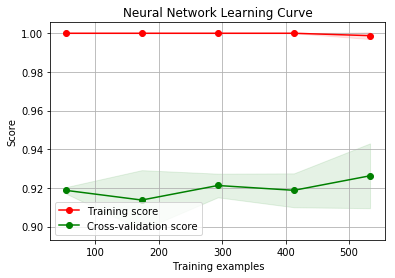

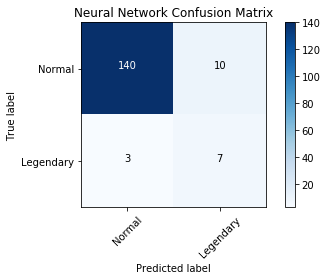

In [143]:
#PDS EM NN

gmm = GaussianMixture(n_components=2, covariance_type="full")
pkmn_y_pred = gmm.fit_predict(pkmn_x_scaled)

pkmn_new_x = pd.concat([pkmn_x_scaled,pd.DataFrame(data=pkmn_y_pred)], axis=1)
    
pkmn_new_df = pd.concat([pkmn_new_x, pkmn_y], axis=1)

train_nn, test_nn = train_test_split(pkmn_new_df, test_size=0.2)

train_y_nn = train_nn["Legendary"]
train_x_nn = train_nn.drop(["Legendary"], axis=1)

test_y_nn = test_nn["Legendary"]
test_x_nn = test_nn.drop(["Legendary"], axis=1)

print("=" * 40)
print(f"Neural Network for EM on PDS")

param_grid={
'activation': ["relu", "tanh"],
'solver': ['lbfgs'],
'hidden_layer_sizes': [(90,50)],
'max_iter': [200 ,400, 600, 800, 1000]}

nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
nn_clf.fit(X=train_x_nn, y=train_y_nn)

nn_model = nn_clf.best_estimator_
print(nn_clf.best_score_, nn_clf.best_params_)

y_pred = nn_model.predict(test_x_nn)

print("Testing set accuracy: ", f1_score(test_y_nn, y_pred))

plot_learning_curve(nn_model, "Neural Network Learning Curve", pkmn_new_x, pkmn_y, cv=3, scoring=metric)

cnf_mtx = confusion_matrix(test_y_nn, y_pred)
plt.figure()
plot_confusion_matrix(cnf_mtx, classes=["Normal","Legendary"], normalize=False, title="Neural Network Confusion Matrix")
plt.show()

Neural Network for KMeans on HLD
0.6718125 {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 800, 'solver': 'lbfgs'}
Testing set accuracy:  0.7287749227901076


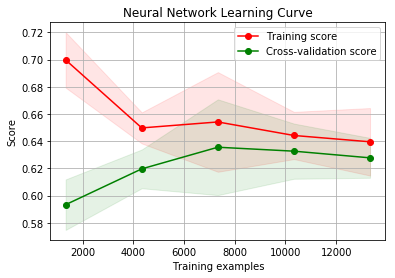

In [135]:
# HLD EM NN

    
gmm = GaussianMixture(n_components=26, covariance_type="full")
lettr_y_pred = gmm.fit_predict(lettr_x_scaled)

lettr_new_x = pd.concat([pd.DataFrame(data=lettr_y_pred),lettr_x_scaled], axis=1)

lettr_new_df = pd.concat([lettr_new_x, lettr_y_ohe], axis=1)

train_nn, test_nn = train_test_split(lettr_new_df, test_size=0.2)



train_y_nn = train_nn.iloc[:, -26:]
train_x_nn = train_nn.iloc[:, :-26]

test_y_nn = test_nn.iloc[:, -26:]
test_x_nn = test_nn.iloc[:, :-26]



print("=" * 40)
print(f"Neural Network for EM on HLD")

param_grid={
'activation': ["relu", "tanh"],
'solver': ['lbfgs'],
'hidden_layer_sizes': [(50,50)],
'max_iter': [200 ,400, 600, 800, 1000]}

nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
nn_clf.fit(X=train_x_nn, y=train_y_nn)

nn_model = nn_clf.best_estimator_
print(nn_clf.best_score_, nn_clf.best_params_)

y_pred = nn_model.predict(test_x_nn)

print("Testing set accuracy: ", f1_score(test_y_nn, y_pred, average="macro"))

plot_learning_curve(nn_model, "Neural Network Learning Curve", lettr_new_x, lettr_y_ohe, cv=3, scoring=metric)

plt.show()

Neural Network PDS Baseline
0.9265625 {'activation': 'relu', 'hidden_layer_sizes': (90, 50), 'max_iter': 200, 'solver': 'lbfgs'}
Testing set accuracy:  0.4210526315789474
Confusion matrix, without normalization
[[145   6]
 [  5   4]]


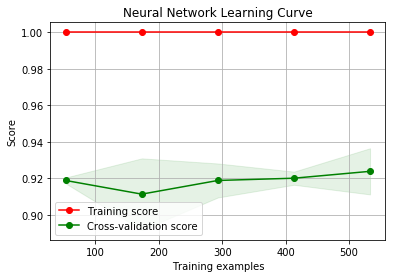

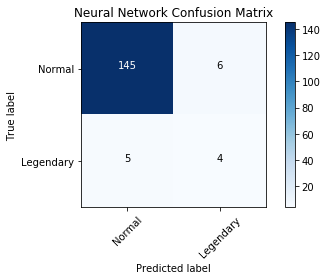

In [145]:
## Base line neural network

pkmn_new_x = pkmn_x_scaled
    
pkmn_new_df = pd.concat([pkmn_new_x, pkmn_y], axis=1)

train_nn, test_nn = train_test_split(pkmn_new_df, test_size=0.2)

train_y_nn = train_nn["Legendary"]
train_x_nn = train_nn.drop(["Legendary"], axis=1)

test_y_nn = test_nn["Legendary"]
test_x_nn = test_nn.drop(["Legendary"], axis=1)

print("=" * 40)
print(f"Neural Network PDS Baseline")

param_grid={
'activation': ["relu", "tanh"],
'solver': ['lbfgs'],
'hidden_layer_sizes': [(90,50)],
'max_iter': [200 ,400, 600, 800, 1000]}

nn_clf = GridSearchCV(MLPClassifier(), param_grid=param_grid, scoring=metric, cv=3)
nn_clf.fit(X=train_x_nn, y=train_y_nn)

nn_model = nn_clf.best_estimator_
print(nn_clf.best_score_, nn_clf.best_params_)

y_pred = nn_model.predict(test_x_nn)

print("Testing set accuracy: ", f1_score(test_y_nn, y_pred))

plot_learning_curve(nn_model, "Neural Network Learning Curve", pkmn_new_x, pkmn_y, cv=3, scoring=metric)

cnf_mtx = confusion_matrix(test_y_nn, y_pred)
plt.figure()
plot_confusion_matrix(cnf_mtx, classes=["Normal","Legendary"], normalize=False, title="Neural Network Confusion Matrix")
plt.show()